# ML Course 3 - Assignment

### Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [3]:
import numpy as np
import pandas as pd
import sklearn 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("FuelConsumption.csv")

In [5]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
835,2014,NISSAN,370Z ROADSTER,TWO-SEATER,3.7,6,M6,Z,13.5,9.6,11.7,24,269
397,2014,FORD,FLEX,SUV - STANDARD,3.5,6,AS6,X,13.2,9.4,11.5,25,264
816,2014,MITSUBISHI,LANCER,COMPACT,2.0,4,AV6,X,9.2,7.0,8.2,34,189
194,2014,CHEVROLET,CAMARO ZL1,COMPACT,6.2,8,M6,Z,16.7,12.5,14.8,19,340
380,2014,FORD,F150 FFV,PICKUP TRUCK - STANDARD,5.0,8,A6,E,22.1,16.7,19.7,14,315
367,2014,FORD,EXPLORER FFV AWD,SUV - STANDARD,3.5,6,AS6,X,14.3,10.3,12.5,23,288


* Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
* Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
* Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
* What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
* Plot the fit line over the data.
* Plot the distribution of the residuals (i.e. the error terms).
* Compute the model accuracy.
* Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and compute the accuracy. Compare with the accuracy computed at previous point. What can you deduce?

Data Inspection

In [27]:
#data = data.drop(['MODELYEAR'], axis=1)
data.head()


,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
correlation = data.corr()
correlation

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [29]:
correlation.style.background_gradient(cmap='coolwarm')

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [31]:
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
correlation[mask] = np.nan
(correlation
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,nan,nan,nan,nan,nan,nan,nan
CYLINDERS,0.93,nan,nan,nan,nan,nan,nan
FUELCONSUMPTION_CITY,0.83,0.80,nan,nan,nan,nan,nan
FUELCONSUMPTION_HWY,0.78,0.72,0.97,nan,nan,nan,nan
FUELCONSUMPTION_COMB,0.82,0.78,1.00,0.99,nan,nan,nan
FUELCONSUMPTION_COMB_MPG,-0.81,-0.77,-0.94,-0.89,-0.93,nan,nan
CO2EMISSIONS,0.87,0.85,0.90,0.86,0.89,-0.91,nan


**Same chart**

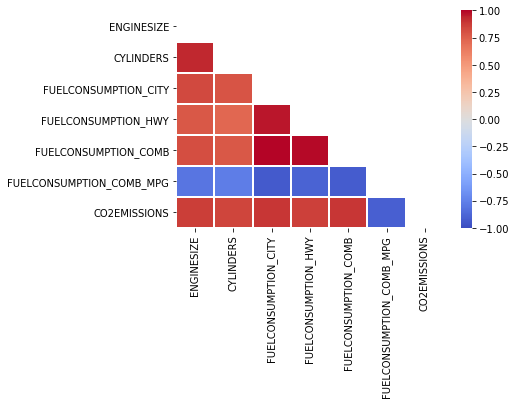

In [32]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  # Mask to keep only one half of the symetrical matrix
sns.heatmap(correlation,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            mask = mask,
            linewidths=0.1)
plt.show()

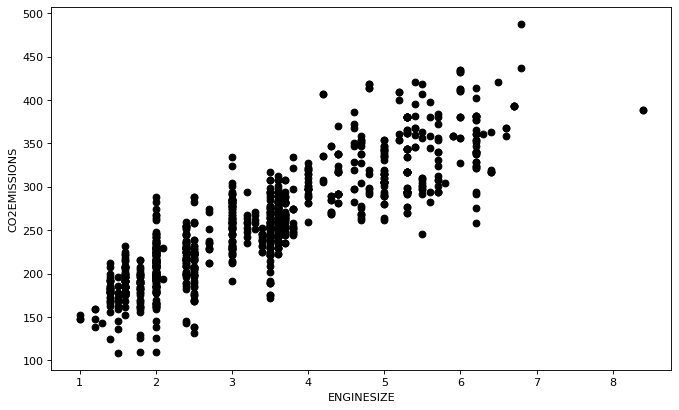

In [33]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], c='black')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

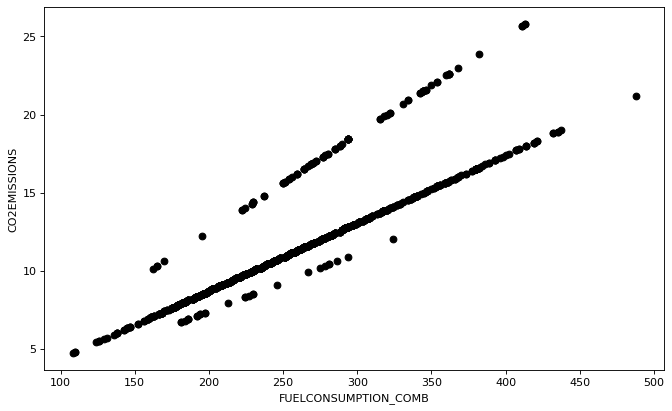

In [34]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['CO2EMISSIONS'], data['FUELCONSUMPTION_COMB'], c='black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

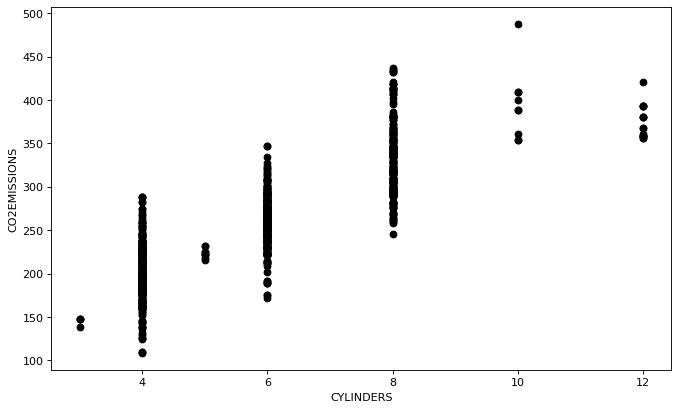

In [35]:

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], c='black')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Simple linear regression

We notice that engine size is correlated with the "Co2 Emission"

### Data Preparation

In [36]:
X = data['ENGINESIZE'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Linear regression fitting


In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

We can check the parameters of the model (estimations of beta_0 and beta_1):

In [39]:
print(regressor.intercept_)

[125.07790675]


In [40]:
print(regressor.coef_)

[[39.85725417]]


### Making predictions

Now we can make predictions. Example: prediction of Co2 Emission for engine size 10 on CO2 emission.

In [41]:
print(regressor.intercept_[0] + regressor.coef_[0][0] * 10)

523.6504484866252


In [42]:
print(regressor.predict([[10]]))

[[523.65044849]]


We plot the prediction line.

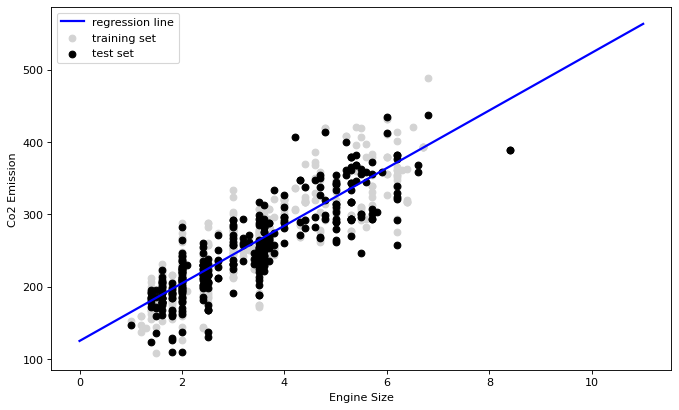

In [43]:
X_plot = np.arange(0,12,1).reshape(-1, 1)
y_plot = regressor.predict(X_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.legend()
plt.show()

### Model performance assessment

In [44]:
y_pred = regressor.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 373781.28
Mean absolute error (MAE): 24.86
Mean square error (MSE): 1049.95
Root mean square error (RMSE): 32.40


## Comparing model with Combustion

In [45]:
X = data['FUELCONSUMPTION_COMB'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
print(regressor.intercept_)

[66.98908391]


In [49]:
print(regressor.coef_)

[[16.46357725]]


In [50]:
print(regressor.intercept_[0] + regressor.coef_[0][0] * 40)

725.5321738365967


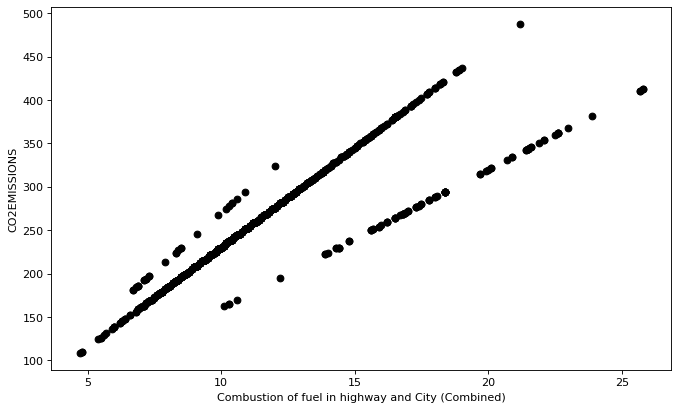

In [51]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Combustion of fuel in highway and City (Combined)")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [52]:
y_pred = regressor.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 309995.19
Mean absolute error (MAE): 20.34
Mean square error (MSE): 870.77
Root mean square error (RMSE): 29.51
